In [1]:
%load_ext autoreload
%autoreload 2

- [Element Picker](#Element-Picker)
- [Gaussian Smoothing Picker](#Gaussian-Smoothing-Picker)
- [Von Mises](#Von-Mises-Stress-Condition)
- [Von Mises Result](#Von-Mises-Result)
- [Circle](#Circle-Stress-Condition)
- [Circle Result](#Circle-Result)

In [2]:
import struct_opt.material_opt as material_opt
import struct_opt.visual as visual
from struct_opt.environment_setup import get_element_index_matrix

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


Element Picker
---

elements are indexed in the following manner

| 1 | 5 | 9  | 13 |
|---|---|----|----|
| 2 | 6 | 10 | 14 |
| 3 | 7 | 11 | 15 |
| 4 | 8 | 12 | 16 |

visualize elements using function below

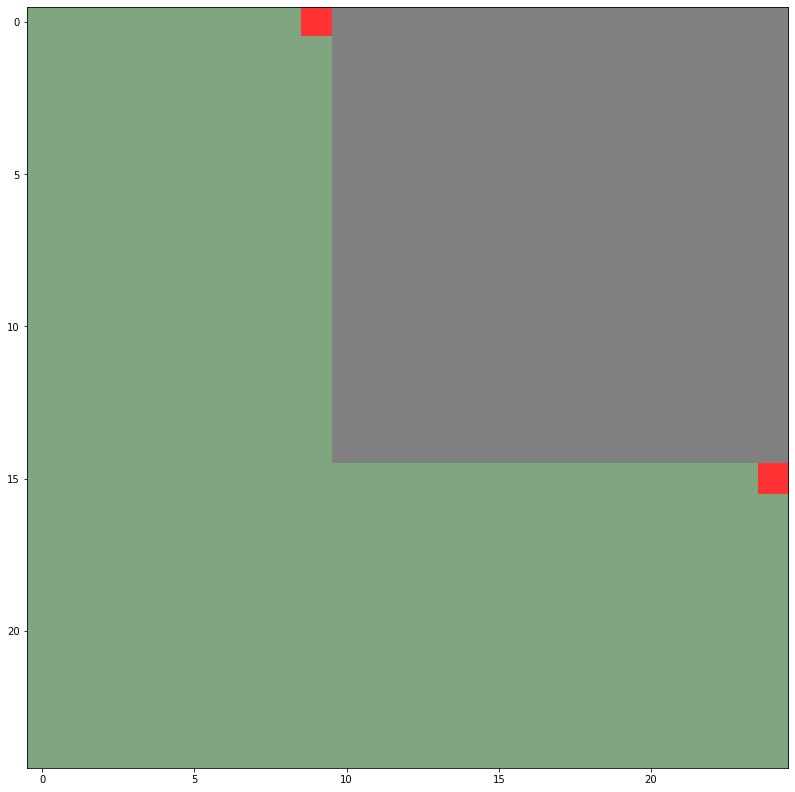

In [3]:
problem_size = 5

elements = [16 * np.square(problem_size) - problem_size * 2, 225]
element_index_matrix = get_element_index_matrix(problem_size)


visual.highlight_elements(element_index_matrix, elements)

Gaussian Smoothing Picker
---

Use this to check how the mass is spread out for different value of the variance and width of some element

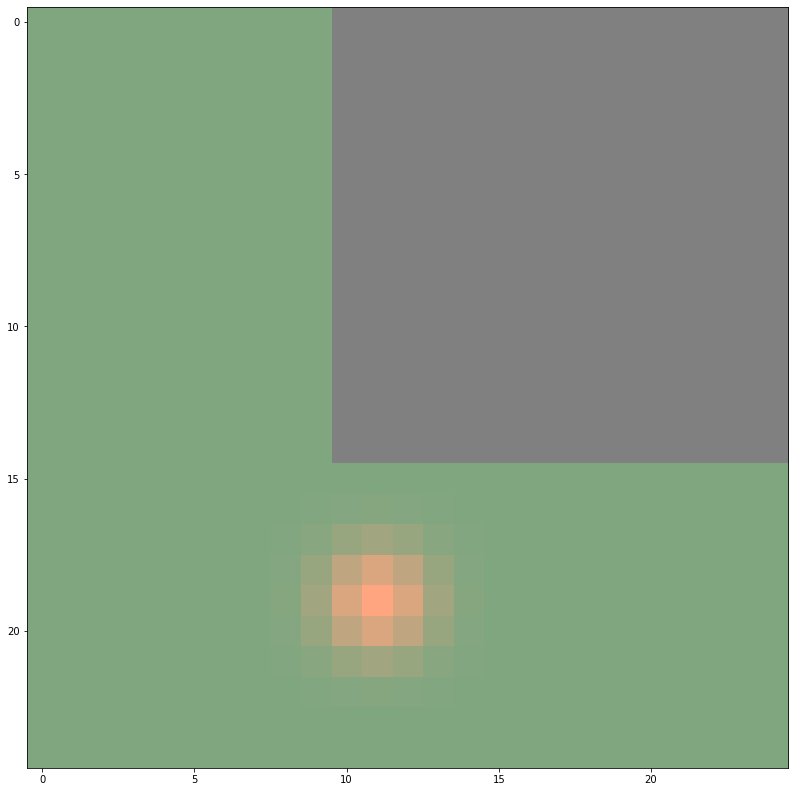

In [31]:
visual.highlight_gaussian_smoothing(element_index_matrix, element=264, variance=3.0, width=6.0)

Von Mises Stress Condition
---

In [37]:
problem_size = 5
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2
    ]),
    directions=np.array([
        1
    ]),
    amplitudes=np.array([
        -1
    ]),
    max_constraint=3000,
    
    mode="von mises",
    
    smoothing_mode="none",
    smoothing_width=2,
    variance=1,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=100,
    barrier_width=300,
    
    epochs=100,
    learning_rate=0.1,
    
    data_directory="data"
)


Initializing env: 0.009926319122314453 seconds
0: O: 156.7860628162762 W: 352.31883119115344 C 2293.376586554071 -- T: 0.3183317184448242
1: O: 148.7342223698795 W: 348.9652193340961 C 2259.385567675536 -- T: 0.15963172912597656
2: O: 140.88948244989106 W: 345.18522874333524 C 2228.6612442999854 -- T: 0.17303991317749023
3: O: 133.13869469241052 W: 341.00415097066934 C 2200.6293354484587 -- T: 0.15994501113891602
4: O: 125.38865470181895 W: 336.4245780541335 C 2174.8795138320666 -- T: 0.1685187816619873
5: O: 117.55977697884316 W: 331.43968783767883 C 2151.0763146528498 -- T: 0.16247868537902832
6: O: 109.58377274154034 W: 326.04100481650585 C 2128.912434261682 -- T: 0.18001818656921387
7: O: 106.98095533650877 W: 320.22065041774886 C 2156.4938974119195 -- T: 0.21956825256347656
8: O: 100.01614069764662 W: 314.35070836136015 C 2147.207837866584 -- T: 0.17366337776184082
9: O: 91.42165816081496 W: 308.2278223935482 C 2125.8676203508858 -- T: 0.16803836822509766
10: O: 84.53992015910194 

87: O: -55.361500208888884 W: 154.8699133569648 C 2181.853815584239 -- T: 0.17181897163391113
88: O: -54.72767311722467 W: 154.55610473569993 C 2189.635814016138 -- T: 0.16328215599060059
89: O: -38.00620373290968 W: 154.28449564204374 C 2315.9184198486746 -- T: 0.17209196090698242
90: O: -54.967450600296246 W: 154.10841195312523 C 2190.8949749973417 -- T: 0.15833663940429688
91: O: -56.44832375491572 W: 153.92090960425156 C 2180.3911349978252 -- T: 0.17213702201843262
92: O: -56.60436222981127 W: 153.7166778842121 C 2180.980162667499 -- T: 0.16341590881347656
93: O: -56.19827732961767 W: 153.5194083328535 C 2185.685184408399 -- T: 0.22341609001159668
94: O: -58.72951858905236 W: 153.3060063386764 C 2166.7650462004067 -- T: 0.19023489952087402
95: O: -58.57074329053901 W: 153.0676209494024 C 2170.1440185508177 -- T: 0.16703462600708008
96: O: -58.55741735404834 W: 152.807012750478 C 2172.22623777665 -- T: 0.15874361991882324
97: O: -58.79381196059404 W: 152.5196332509526 C 2172.7328082

Von Mises Result
---

No handles with labels found to put in legend.


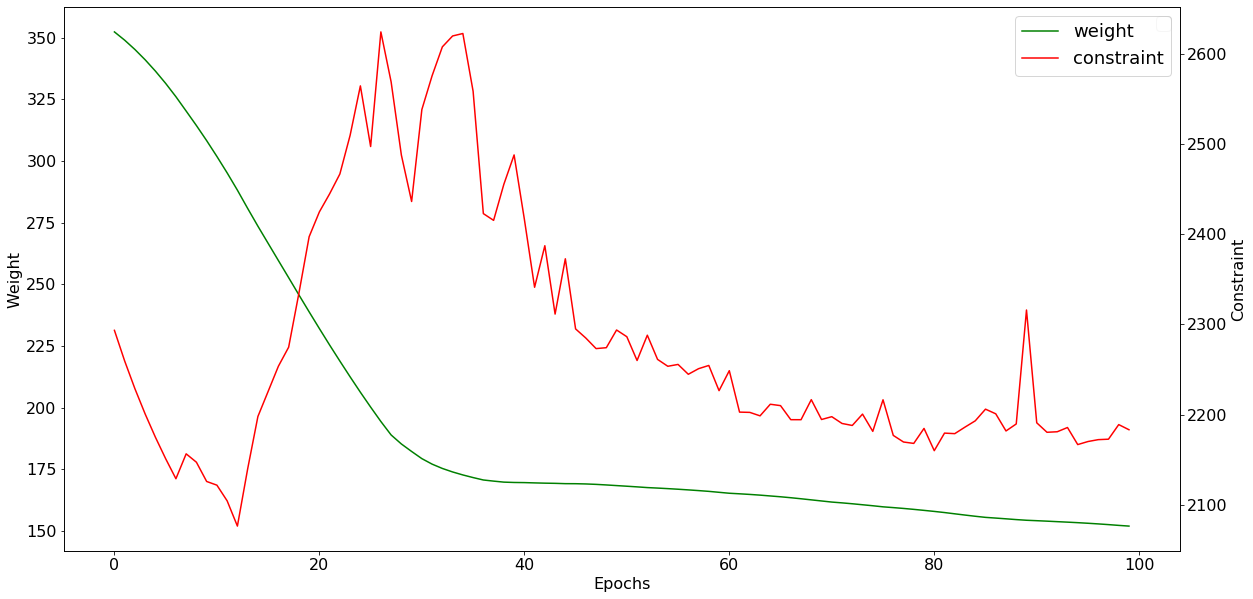

In [39]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

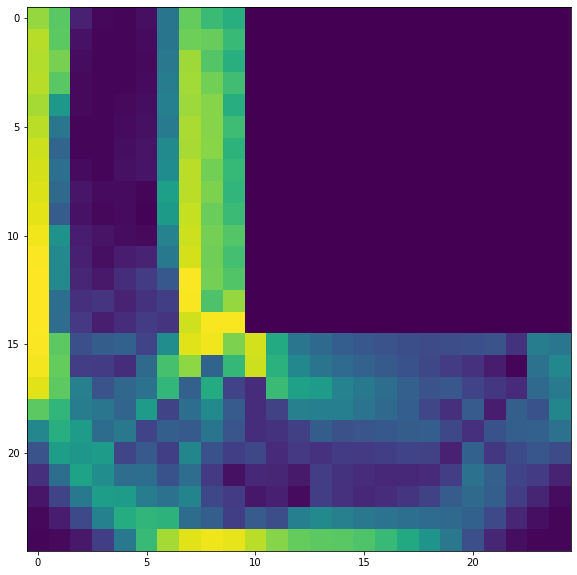

In [40]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())

Circle Stress Condition
---

In [35]:
problem_size = 5
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2, 225
    ]),
    directions=np.array([
        1,
        1
    ]),
    amplitudes=np.array([
        -1,
        -1
    ]),
    max_constraint=13000,
    
    mode="circle",
    smoothing_mode="none",
    smoothing_width=2,
    variance=1,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=100,
    barrier_width=300,
    
    epochs=100,
    learning_rate=0.1,
    
    phis=[0.0, 0.5],
    kf=0.3,
    
    data_directory="data"
)


Initializing env: 0.008124113082885742 seconds
0: O: 248.2387354834289 W: 352.31883119115344 C 12716.851599649843 -- T: 1.0804409980773926
1: O: 208.79042419025893 W: 355.24771993050274 C 12567.430441046476 -- T: 0.3155629634857178
2: O: 185.0124276515857 W: 357.52073036710624 C 12438.70129593067 -- T: 0.31757283210754395
3: O: 168.68175110869268 W: 359.2640651011493 C 12327.505908272195 -- T: 0.3259446620941162
4: O: 156.56984525150472 W: 360.57014335660847 C 12230.94208435663 -- T: 0.30702686309814453
5: O: 147.96650184322732 W: 361.4999906991616 C 12154.016447530666 -- T: 0.3147561550140381
6: O: 141.09503480494618 W: 362.13407573072703 C 12088.072421933235 -- T: 0.33621740341186523
7: O: 135.05401050249637 W: 362.48694690229 C 12027.860271754664 -- T: 0.3446006774902344
8: O: 129.67476905123448 W: 362.5830642056385 C 11973.147955692697 -- T: 0.32617950439453125
9: O: 124.8150507068828 W: 362.443102019485 C 11923.521148402906 -- T: 0.31685876846313477
10: O: 120.36168253363425 W: 36

88: O: 32.54337977580457 W: 299.1213635818642 C 11562.090690202156 -- T: 0.3123202323913574
89: O: 32.18661777184377 W: 299.1606197961023 C 11556.654919384366 -- T: 0.31864047050476074
90: O: 32.267419842921356 W: 299.17870254818854 C 11557.560605120825 -- T: 0.3176393508911133
91: O: 32.27424886731819 W: 299.177621925321 C 11557.619715241406 -- T: 0.3196718692779541
92: O: 33.05792684665971 W: 299.1586823831383 C 11568.930100527134 -- T: 0.33796215057373047
93: O: 32.273182503888734 W: 299.140153477653 C 11557.95853561176 -- T: 0.3513622283935547
94: O: 32.25393883713707 W: 299.10571308586907 C 11558.155229969048 -- T: 0.32515835762023926
95: O: 32.17979566811158 W: 299.0570819776906 C 11557.808015462198 -- T: 0.3100306987762451
96: O: 32.056208364158124 W: 298.9955303866613 C 11556.95869764451 -- T: 0.3275313377380371
97: O: 32.89048815263493 W: 298.92197487934794 C 11569.920891611675 -- T: 0.32204365730285645
98: O: 32.05109247282331 W: 299.01011756074996 C 11556.987890252563 -- T: 

Circle Result
---

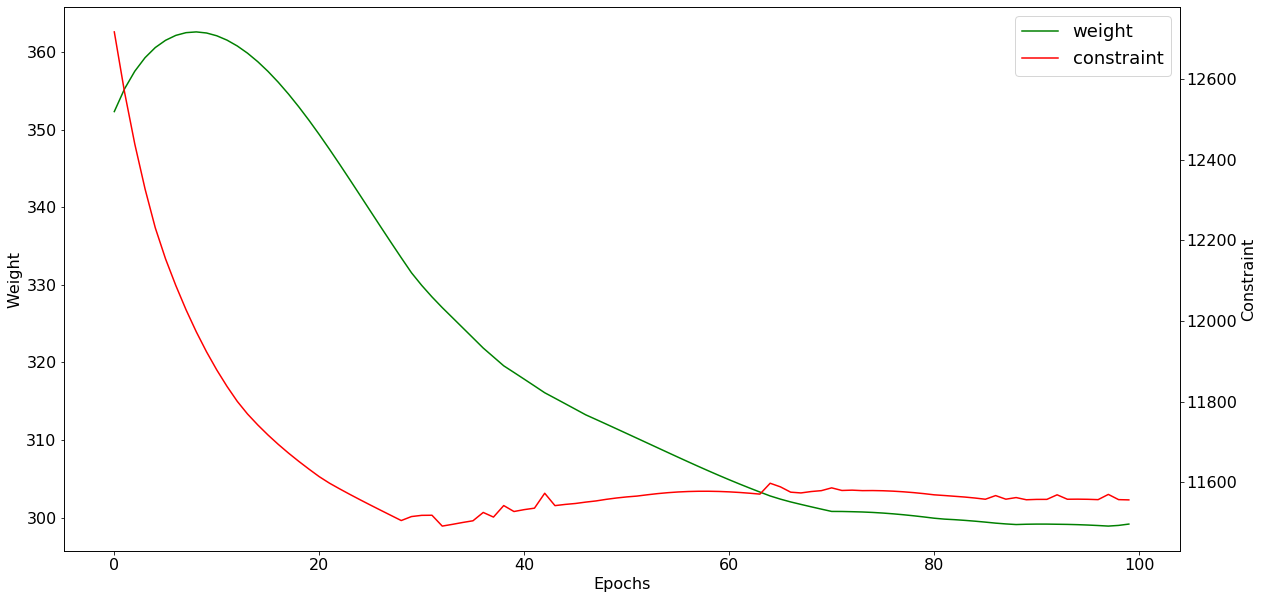

In [36]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

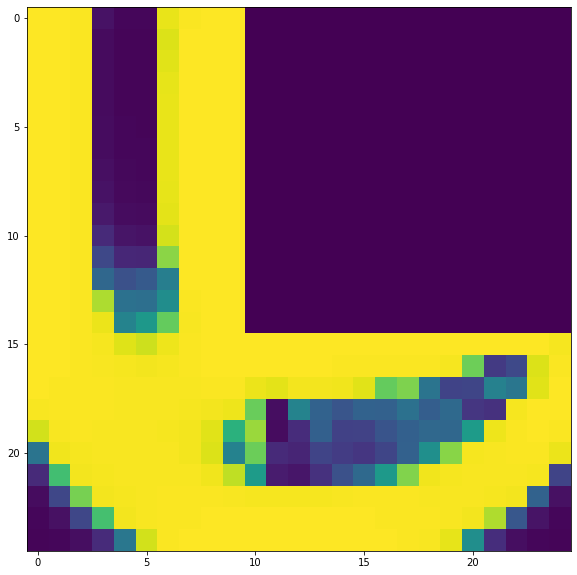

In [37]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())